In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import operator
import unittest

# 1. Générateur de villes

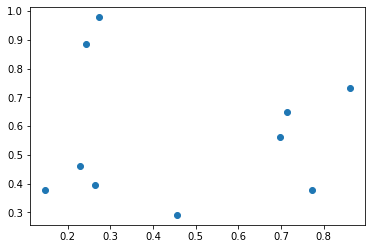

In [2]:
def cree_villes(n, d=2):
    """Génère aléatoirement n points dans un espace à d-dimensions
    args: 
        n (int) :  nombre de villes
        d (int, optional) : nombre de dimensions
        
    returns:
        V (array of arrays of floats):  positions des villes générées"""
    V = []
    for _ in range(d):
        L = np.random.rand(n)
        V.append(L)
    return np.transpose(V)

villes = cree_villes(10)

plt.scatter(villes.transpose()[0], villes.transpose()[1])
plt.show()

### Tracer un chemin dans un plan (d=2)

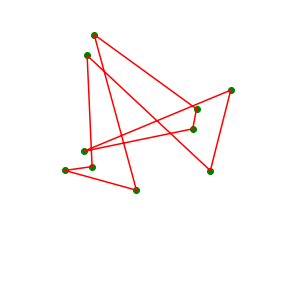

In [3]:
def tracer(villes, chemin):
    """Trace le chemin passant par les villes
    args:
        villes (array of arrays of floats): position des villes
        chemin (array of ints or list of ints):  ordre des indice de passage des villes
        
    returns:
        None"""
    X,Y = np.transpose(villes)
    fig = plt.figure(figsize=(5,5))
    plt.xlim((-0.1,1.1))
    plt.ylim((-0.1,1.1))
    plt.axis('off')
    x = [villes[chemin[i]][0] for i in range(-1,len(chemin))]
    y = [villes[chemin[i]][1] for i in range(-1,len(chemin))]
    plt.plot(x, y, color='r')
    plt.scatter(X, Y, color='green')
    plt.show()
    return

chemin = np.arange(10)
np.random.shuffle(chemin)
tracer(villes, chemin)

### Longueur du chemin

In [4]:
def longueurd(villes, chemin): 
    """Calcule la longueur de la boucle passant par toutes les villes en respectant l'ordre du chemin
    args :
        villes (array of arrays of floats): position des villes
        chemin (array of ints or list of ints):  ordre des indice de passage des villes
        
    returns:
        long (float): longueur du chemin"""
    _, d = np.shape(villes)
    long = np.sum([(villes[-1][k]-villes[0][k])**2 for k in range(d)])**(1/2) #distance entre la première et le dernière ville 
    
    for i,j in zip(chemin[:-1], chemin[1:]):
        long += np.sum([(villes[i][k]-villes[j][k])**2 for k in range(d)])**(1/2) 
    return long

def longueur2(villes, chemin): # marche en dim 2 uniquement, 2 fois plus efficace en terme de temps d'execution
    """Calcule la longueur de la boucle passant par toutes les villes en respectant l'ordre du chemin
    args :
        villes (array of arrays of floats): position des villes
        chemin (array of ints or list of ints):  ordre des indice de passage des villes
        
    returns:
        long (float): longueur du chemin"""
    long = ((villes[-1][0]-villes[0][0])**2 + (villes[-1][1]-villes[0][1])**2) **(1/2)
    for i,j in zip(chemin[:-1], chemin[1:]):
        long += ((villes[i][0]-villes[j][0])**2 + (villes[i][1]-villes[j][1])**2) **(1/2)
    i, j = chemin[-1],chemin[0]
    return long

longueur = longueur2
villes = cree_villes(4,2)
chemin = np.arange(4)
longueur(villes, chemin)

1.743962418541401

## Test unitaire de la fonction de longueur :

In [5]:
"""On place des points en un carré aléatoirement (avec une orientation aléatoire) 
et on vérifie que le chemin faisant le contour du carré a pour longueur le périmètre du carré"""

class TestLongueur(unittest.TestCase):
    def test_longueur(self):
        for _ in range(100):
            x0,y0 = np.random.rand(2)
            a, b = np.random.rand(2)
            Vcarré = np.array([[x0+a, x0+b, x0-a, x0-b],[y0+b, y0-a, y0-b,y0+a]])
            cote = np.sqrt((a+b)**2 + (a-b)**2)
            chemin = [0,1,2,3]
            self.assertAlmostEqual(longueur(Vcarré.transpose(),chemin), 4*cote, places=9)
    
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


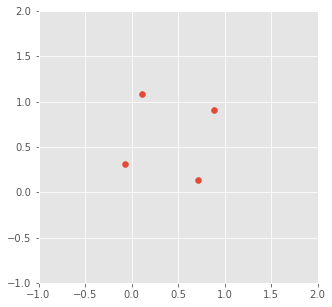

In [44]:
x0,y0 = np.random.rand(2)
a, b = np.random.rand(2)
Vcarré = np.array([[x0+a, x0+b, x0-a, x0-b],[y0+b, y0-a, y0-b,y0+a]])
plt.figure(figsize=(5,5))
plt.xlim((-1,2))
plt.ylim((-1,2))
plt.scatter(Vcarré[0],Vcarré[1])
plt.show()

# 2. Gestion d'une population de chemins
### a) Générer des chemins et leur attribuer un score

In [7]:
def chemins(n,k):
    """Génère k ordres de passage pour n villes (ie une permutation de [|1;n|])
    args :
        n (int): nombre de villes à permuter
        k (int): nombre de chemins à générer
    returns:
        L (array of array of ints): tableau contenant les  k chemins"""
    L = []
    for _ in range(k):
        chemin = np.arange(n)
        np.random.shuffle(chemin)
        L.append(chemin)
    return np.array(L)

def scores(M, villes):
    """Calcule les longueurs des chemins pour chacune des lignes de la matrice 
    et donne un tableau de probabilités de préférence des lignes
    args :
        M (array of arrays of ints): Matrice dont chacune des lignes correspond à un chemin 
        
    returns 
        L (array of floats/ints) :  tableau des longueurs correspondant chacune des lignes de M
        P (array of floats): tableau normalisé des inverses des distances de chacune des lignes 
        (de sorte que la somme de ses valeurs soit 1)
        C (array of ints): tableau des indices des chemins par ordre croissant de longueur"""
        
    n = len(M) #nombre de lignes de M
    L = np.zeros(n)
    for i in range(n):
        L[i] = longueur(villes, M[i])
    P = (1/L)/np.sum(1/L)

    return P, L

villes = cree_villes(10)
M = chemins(10, 5)
P, L = scores(M,villes)
print(P)
print(L)


[0.21444246 0.24470054 0.19915747 0.1804311  0.16126843]
[4.87177454 4.26936242 5.24567465 5.79010663 6.47811431]


### b)  Définir les meilleurs chemins d'une génération (pour former un groupe d"élites)

In [8]:
def classement(P):
    """Obtient le classement sur les indices d'un tableau par ordre décroissant
    args: 
        P (array of floats):  tableau dont on veut classer les indices
    returns:
        C (array of ints): indices par ordre décroissant de valeurs dans P 
                          (C[0] contient l'indice de la plus grande valeur de P, 
                           C[-1] l'indice de la plus petite valeur de P)"""
    n = len(P)
    classeur = {}
    for i in range(n):
        classeur[i] = P[i]
    C = np.array(sorted(classeur.items(),key = operator.itemgetter(1), reverse = True))[:,0]
    return C.astype('int')

C = classement(P)
print([P[i] for i in C])

[0.24470054365208813, 0.2144424576563784, 0.19915747232632508, 0.18043109946724267, 0.16126842689796558]


### c) Faire le croisement de deux chemins

In [9]:
def croisement_ordonné(p1, p2):
    """Croise des caractéristiques des chemins parents p1 et p2 aléatoirement en prenant 
    un bloc d'un parent tel quel et en donnant le reste venant de l'autre parent séparé en deux blocs.
    args: 
        p1 (array of ints):  chemin
        p2 (array of ints):  chemin
        
    returns:
        f1 (array of ints): chemin
        f2 (array of ints): chemin"""
    
    n,m = np.random.randint(0, len(p1), 2)
    debut, fin = min(n,m), max(n,m)
    
    f11 = [p1[i] for i in range(debut, fin)] 
    f21 = [p2[i] for i in range(debut, fin)]
    f12 = []
    f22 = []
    for i in range(len(p1)):
        if p2[i] not in f11:
            f12.append(p2[i])
        if p1[i] not in f21:
            f22.append(p1[i])
            
    f1 = np.array(f12[:debut] + f11 + f12[debut:]).astype('int')
    f2 = np.array(f22[:debut] + f21 + f22[debut:]).astype('int')
    
    return f1, f2

p1, p2 = chemins(10,2)
print(p1, p2)
print(croisement_ordonné(p1, p2))

[6 8 5 4 0 9 2 7 3 1] [8 3 2 9 4 1 0 7 5 6]
(array([8, 1, 5, 4, 0, 9, 2, 7, 3, 6]), array([6, 8, 2, 9, 4, 1, 0, 7, 5, 3]))


In [10]:
def croisement_echantillon(p1, p2):
    """Croise des caractéristiques des chemins parents p1 et p2 aléatoirement echantillonnant un nombre aléatoire 
    de villes et en echangeant l'ordre de passage par ses ville dans les deux chemins
    args: 
        p1 (array of ints):  chemin
        p2 (array of ints):  chemin
        
    returns:
        f1 (array of ints): chemin
        f2 (array of ints): chemin"""
    n = len(p1)
    k = np.random.randint(1,n)
    echantillon = np.random.choice(np.arange(n), k, replace = False)
    indices1 = []
    indices2 = []
    for i in range(n):
        if p1[i] in echantillon:
            indices1.append(i)
        if p2[i] in echantillon:
            indices2.append(i)
    f1 = np.copy(p1)
    f2 = np.copy(p2)
    for i in range(k):
        f1[indices1[i]] = p2[indices2[i]]
        f2[indices2[i]] = p1[indices1[i]]
    return f1.astype('int'), f2.astype('int')

p1, p2 = chemins(10,2)
print(p1, p2)
print(croisement_echantillon(p1, p2))

[9 6 3 8 0 7 5 4 2 1] [2 0 3 4 8 9 6 7 1 5]
(array([4, 6, 3, 8, 0, 9, 5, 7, 2, 1]), array([2, 0, 3, 9, 8, 7, 6, 4, 1, 5]))


### d) Faire des mutations aléatoires dans l'échantillon

$1^{ère}$ méthode à la façon d'un recuit simulé : on fait une transformation élémentaire et on compare à la situation précédente:
Si la transformation a eu un effet positif, on la garde.
Si la transformation a eu un effet négatif, on la garde uniquement avec un probabilité qui baisse exponentiellement quand la température diminue et la perte sur le score augmente.


In [11]:
def mutation_recuit(M, villes, T):
    """Choisit aléatoirement un chemin de la population, et tente une transformation élémentaire (une transposition)
    args:
        M (array of arrays of ints): Matrice dont chacune des lignes correspond à un chemin
        T (float): Coefficient strictement positif correspondant a la température du système 
                    (T->0 => on n'accepte plus les mutations négatives)
    returns:
        M (array of arrays of ints): Matrice avec un chemin potentiellement muté"""
    
    k = np.random.randint(len(M)) #choix de l'individu à faire muter
    chemin = np.copy(M[k])
    l1 = longueur(villes, chemin)
    
    i, j = np.random.choice(np.arange(len(chemin)), 2, replace=False)
    chemin[i], chemin[j] = chemin[j], chemin[i] 
    l2 = longueur(villes, chemin)
    
    if l2 < l1:
        M[k] = chemin
    else:
        if np.random.rand() < np.exp(-(l2-l1)/T):
            M[k] = chemin
    
    return M

M = chemins(10,5)
mutation_recuit(M, villes, 1)

array([[6, 0, 4, 1, 5, 9, 3, 2, 7, 8],
       [5, 2, 0, 9, 4, 8, 6, 3, 1, 7],
       [9, 1, 8, 4, 3, 0, 6, 7, 2, 5],
       [7, 2, 0, 1, 8, 9, 3, 4, 6, 5],
       [4, 8, 9, 1, 7, 0, 6, 2, 5, 3]])

$2^{ème}$ méthode avec des mutations plus systématiques mais à faire à taux très faible

In [12]:
def mutation_taux(M, taux=0.01):
    """Effectue des transpositions aléatoires avec une probabilité taux sur tous les chemins de M
    args:
        M (array of arrays of ints): Matrice dont chacune des lignes correspond à un chemin
        taux (float): probabilité de faire une mutation sur un élément d'un chemin donné
    returns:
        M (array of arrays of ints): Matrice avec un chemin potentiellement muté"""
    
    for i in range(len(M)):
        for j in range(len(M[i])):
            if np.random.rand() < taux:
                k = np.random.randint(len(M[i]))
                M[i, k],M[i, j] = M[i, j], M[i, k]
    return M
M = chemins(10,5)
mutation_taux(M)

array([[3, 6, 1, 4, 7, 5, 9, 8, 0, 2],
       [9, 7, 1, 3, 5, 8, 0, 2, 6, 4],
       [2, 1, 7, 5, 0, 3, 8, 9, 4, 6],
       [9, 4, 8, 1, 7, 5, 0, 3, 2, 6],
       [5, 6, 9, 1, 3, 8, 0, 2, 4, 7]])

# 3) Algorithme génétique

In [13]:
def algo_gen(villes, n_chemins, iterations, n_elites=0, ordonné=True, taux=True, t=0.01, seuil_stag = np.inf):
    """Algorithme génétique sur les chemins afin de minimiser la distance. Les paramètres optionnels permettent de définirs 
        quelles fonctions seront utilisées.
        args:
            villes (array of arrays of floats):  positions des villes
            
            n_chemins (int): taille de la population
            
            iterations (int): nombre de générations
            
            n_elites (int, optional): nombre d'élites, ie nombre de meilleurs chemins gardés a l'identique d'une génération 
                                        à l'autre
                                        
            ordonné (bool, optional): choix de la fonction de cross-over (True=> ordonné, False => echantillon)
            
            taux (bool, optional): choix de la fonction de mutation (True => taux, False => recui)
            
            t (float, optional): taux de mutation ou température selon la fonction de mutation choisie
            
            seuil_stag (int) : nombre d'itérations sans amélioration accpeté. La boucle s'arrete au dela de ce nombre.
        
        returns:
            pop (array of arrays of int): population de chemins finale
            
            L_best (list of floats): liste des meilleurs performances à chaque itération
            
            L_mean (list of floats): liste de la performance moyenne à chaque itération
            """
    if ordonné == True:
        cross_over = croisement_ordonné
    else:
        cross_over = croisement_echantillon
    if taux == True:
        mutation = mutation_taux
    else:
        def mutation(M, t):
            return mutation_recuit(M, villes, t)
    L_best = []
    L_mean = []
    
    pop = chemins(len(villes), n_chemins)
    P, L = scores(pop, villes)
    L_best.append(np.min(L))
    L_mean.append(np.mean(L))
    
    n_reprod = n_chemins - n_elites
    indices = np.arange(n_chemins)
    stagnation = 0
    for it in tqdm(range(1,iterations+1)):
        C = classement(P)
        elites = np.zeros(np.shape(pop[:n_elites]))
        for i in range(n_elites):
            elites[i] = pop[C[i]]
        
        M = np.zeros(np.shape(pop[n_elites:]))
        for i in range(n_reprod):
            k = np.random.choice(indices, p=P)
            M[i] = pop[k]

        for i in range(n_reprod//2):
            M[2*i], M[2*i+1] = cross_over(M[2*i], M[2*i+1])
        M = M.astype('int')
        if taux == False:
            t*= it/(it+1) #On fait baisser la température
        mutation(M, t)
        
        pop = np.concatenate((elites,M)).astype('int')
        P, L = scores(pop, villes)
        L_best.append(np.min(L))
        L_mean.append(np.mean(L))
        
        if L_best[-1]<L_best[-2]:
            stagnation = 0
        else:
            stagnation += 1
        if stagnation > seuil_stag:
            break
    return pop, L_best, L_mean



## Une fonction pour afficher les sorties de l'algorithme précédent

In [14]:
def affichage(villes, pop, L_best, L_mean):
    fig = plt.figure(figsize= (10,5))
    plt.style.use("ggplot")
    plt.subplot(121)
    X,Y = np.transpose(villes)
    plt.axis('off')
    plt.xlim((-0.1,1.1))
    plt.ylim((-0.1,1.1))
    
    P,_ = scores(pop, villes)
    C = classement(P)
    chemin = pop[C[0]]
    
    x = [villes[chemin[i]][0] for i in range(-1,len(chemin))]
    y = [villes[chemin[i]][1] for i in range(-1,len(chemin))]
    plt.plot(x, y, color='r')
    plt.scatter(X, Y, color='green')
    plt.title(f"Meilleur chemin (L={L_best[-1]:.3f})", fontsize=15)
    
    plt.subplot(122)
    n = len(L_best)
    plt.plot([i for i in range(n)], L_best, label="Meilleur chemin")
    plt.plot([i for i in range(n)], L_mean, label="Chemin moyen")
    plt.xlabel("Itérations")
    plt.ylabel("Longueur")
    plt.legend()
    plt.title('Performances au cours du temps')
    
    plt.show()

    
def affichage_d(villes, pop, L_best, L_mean):
    fig = plt.figure(figsize= (5,5))
    plt.style.use("ggplot")
    
    n = len(L_best)
    plt.plot([i for i in range(n)], L_best, label="Meilleur chemin")
    plt.plot([i for i in range(n)], L_mean, label="Chemin moyen")
    plt.xlabel("Itérations")
    plt.ylabel("Longueur")
    plt.legend()
    plt.title(f'Performances au cours du temps (L={L_best[-1]:.3f})')
    
    plt.show()
    
def affichage_3D(villes, pop, L_best, L_mean):
    
    P,_ = scores(pop, villes)
    C = classement(P)
    chemin = pop[C[0]]
    
    x = [villes[chemin[i]][0] for i in range(-1,len(chemin))]
    y = [villes[chemin[i]][1] for i in range(-1,len(chemin))]
    z = [villes[chemin[i]][2] for i in range(-1,len(chemin))]
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')  # Affichage en 3D
    ax.scatter(villes[:,0], villes[:,1], villes[:,2],label='Meilleur chemin', color='green')  # Tracé de la courbe 3D
    ax.plot(x,y,z, color='r')
    #plt.title("Meilleur chemin")
    plt.title(f"Meilleur chemin (L={L_best[-1]:.3f})", fontsize=15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.tight_layout()
    plt.show()

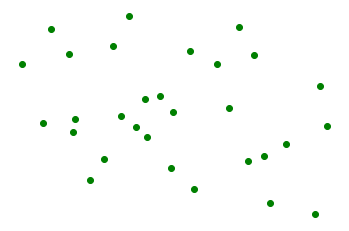

In [14]:
V = np.load("30 villes.npy")
longueur = longueur2
X,Y = np.transpose(V)
plt.axis('off')
plt.scatter(X,Y, color='g')
plt.show()

## Mutation par taux

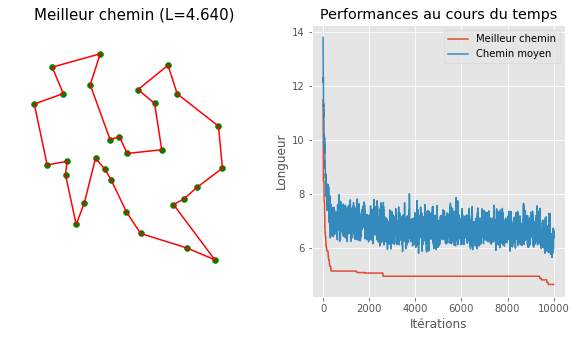

In [15]:
pop, L_best, L_mean = algo_gen(V, 100, 10000, n_elites= 10)
affichage(V, pop, L_best, L_mean)

### Taux de mutation plus élevé

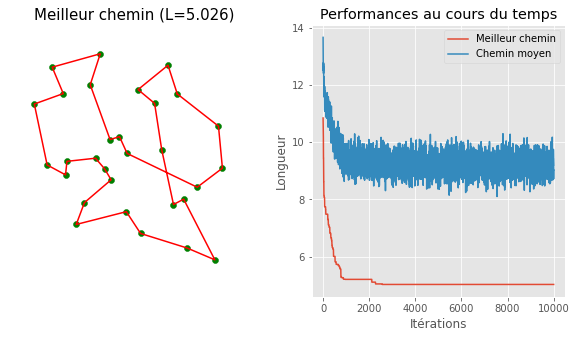

In [16]:
pop, L_best, L_mean = algo_gen(V, 100, 10000, n_elites= 10,t=.05)
affichage(V, pop, L_best, L_mean)

### Taux de mutation plus faible

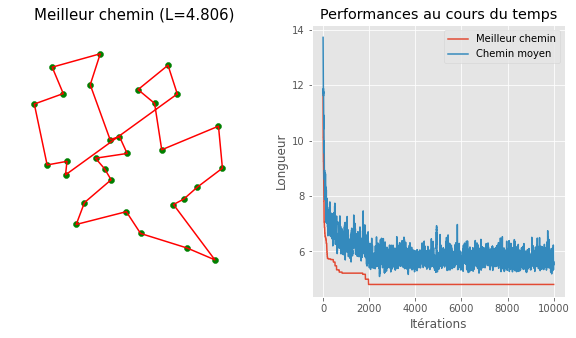

In [17]:
pop, L_best, L_mean = algo_gen(V, 100, 10000, n_elites= 10,t=.005)
affichage(V, pop, L_best, L_mean)

## Mutation par recuit simulé

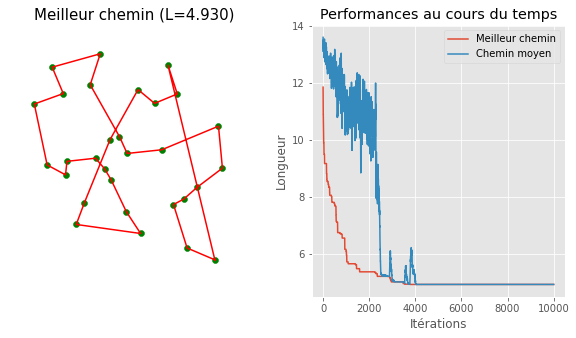

In [21]:
pop, L_best, L_mean = algo_gen(V, 100, 10000, n_elites= 1, taux=False, t=1)
affichage(V, pop, L_best, L_mean)

### Température plus haute au départ

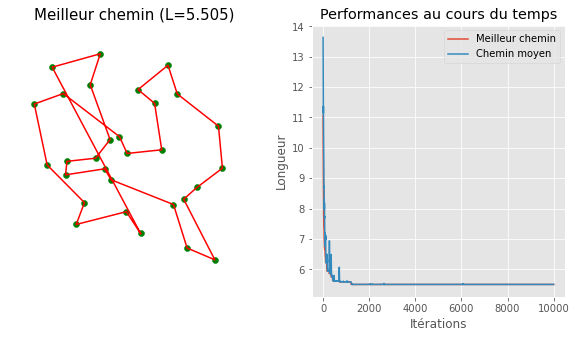

In [22]:
pop, L_best, L_mean = algo_gen(V, 100, 10000, n_elites= 10, taux=False, t=100)
affichage(V, pop, L_best, L_mean)

### Croisement echantilloné

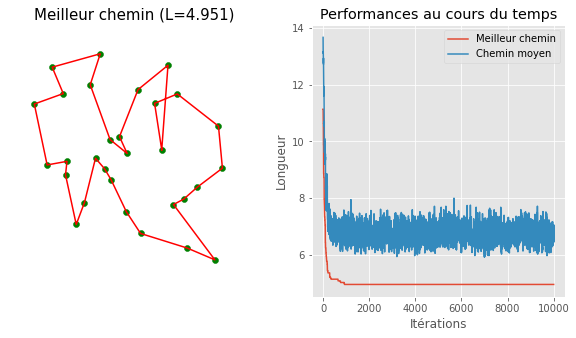

In [23]:
pop, L_best, L_mean = algo_gen(V, 100, 10000, n_elites= 10, ordonné=False)
affichage(V, pop, L_best, L_mean)

### Plus d'élites

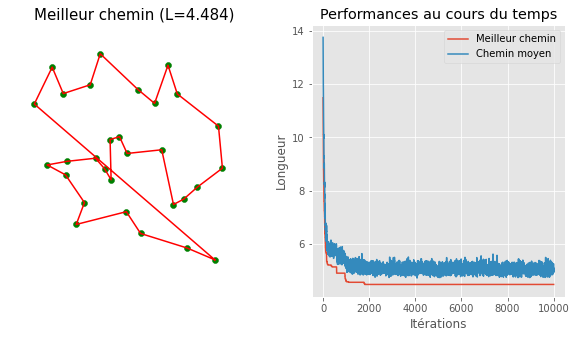

In [24]:
pop, L_best, L_mean = algo_gen(V, 100, 10000, n_elites= 30)
affichage(V, pop, L_best, L_mean)

### Moins d'individus

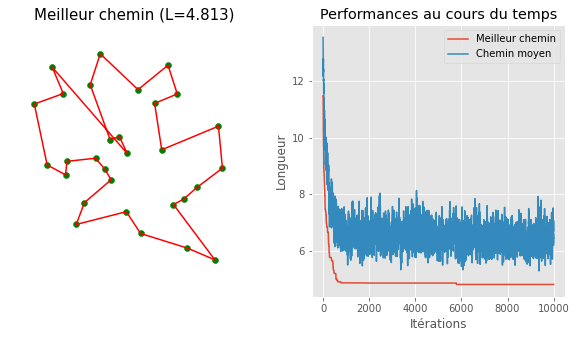

In [25]:
pop, L_best, L_mean = algo_gen(V, 50, 10000, n_elites= 5)
affichage(V, pop, L_best, L_mean)

## Passage en dimensions supérieures

In [26]:
Vd = cree_villes(30,4)

longueur = longueurd

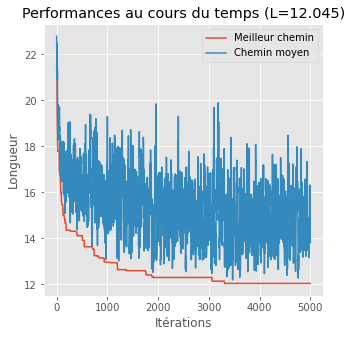

In [27]:
pop, L_best, L_mean = algo_gen(Vd, 10, 5000, n_elites= 1)
affichage_d(Vd, pop, L_best, L_mean)

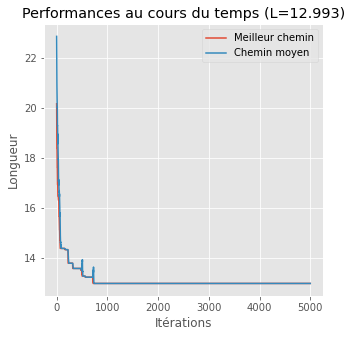

In [28]:
pop, L_best, L_mean = algo_gen(Vd, 50, 5000, n_elites= 10, taux=False, t=1)
affichage_d(Vd, pop, L_best, L_mean)

# Beaucoup de villes

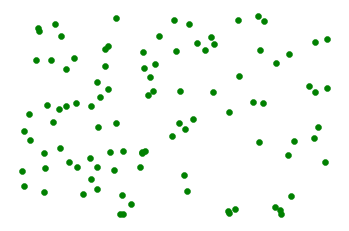

In [29]:
V100 = np.load("100 villes.npy")
longueur = longueur2
X,Y = np.transpose(V100)
plt.axis('off')
plt.scatter(X,Y, color='g')
plt.show()

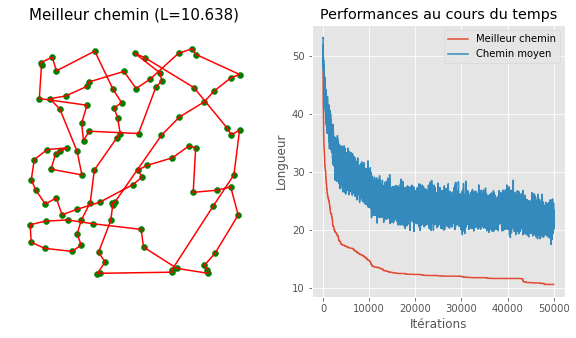

In [30]:
pop, L_best, L_mean = algo_gen(V100, 100, 50000, n_elites= 5, seuil_stag=10000)
affichage(V100, pop, L_best, L_mean)

# En 3D avec affichage

In [31]:
V3D = cree_villes(30,3)
longueur = longueurd

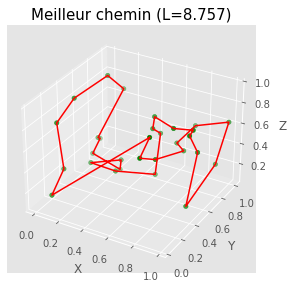

In [32]:
pop, L_best, L_mean = algo_gen(V3D, 100, 10000, n_elites= 10,t=.05)
affichage_3D(V3D, pop, L_best, L_mean)

# Application aux villes de France

In [21]:
vdf = np.load("Villesfr.npy")
noms = np.load("noms.npy")
longueur = longueur2


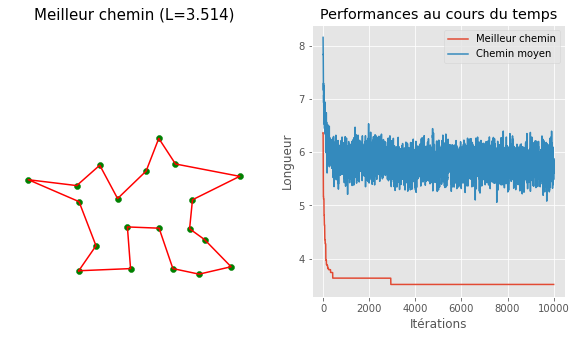

In [26]:
pop, L_best, L_mean = algo_gen(vdf, 100, 10000, n_elites= 10,t=.05,seuil_stag=np.inf)
affichage(vdf, pop, L_best, L_mean)

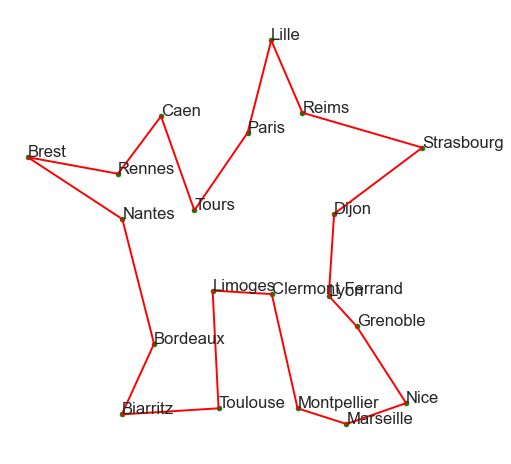

In [63]:
fig, ax = plt.subplots(figsize =(7,7))
plt.style.use('ggplot')
X,Y = np.transpose(vdf)
plt.axis('off')
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,.65))   
P,_ = scores(pop, vdf)
C = classement(P)
chemin = pop[C[0]]
plt.scatter(X, Y, color="g")
plt.plot([X[chemin[i]] for i in range(-1,20)], [Y[chemin[i]] for i in range(-1,20)], color ="r")
for i, txt in enumerate(noms):
    ax.annotate(txt, (X[i], Y[i]), fontsize = 15)
plt.show()

In [29]:
X = np.random.rand(4)
Y = np.random.rand(4)
villes = np.transpose([X,Y])
pop, L_best, L_mean = algo_gen(villes, 50, 1000, n_elites= 5)

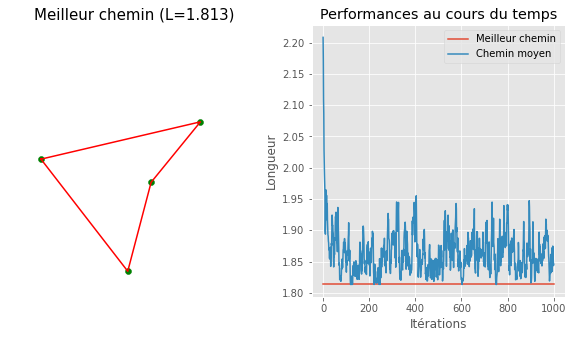

In [30]:
affichage(villes, pop, L_best, L_mean)